In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
df = pd.read_csv("cleaned_preprocessed_dataset.csv")
df.head()


,activitysiteid,activitydescription,bookingenddatetime_(month_/_day_/_year)_apr_may,bookingstarttime_apr_may,maxbookees_apr_may,number_booked_apr_may,price_(inr)_apr_may,bookingenddatetime_(month_/_day_/_year)_june,bookingstarttime_june,maxbookees_june,number_booked_june,price_(inr)_june
0,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0
1,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-12,10:00:00,35.0,23.0,499.0
2,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-19,10:00:00,35.0,21.0,499.0
3,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-26,10:00:00,35.0,18.0,499.0
4,BRP,20:20:20 10-11 Am,2018-04-10,10:00:00,0.239673,0.891390,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0


In [4]:
# Convert date columns
df["bookingenddatetime_(month_/_day_/_year)_apr_may"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_apr_may"], errors="coerce"
)

df["bookingenddatetime_(month_/_day_/_year)_june"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_june"], errors="coerce"
)

# Unified booking date
df["booking_date"] = df[
    "bookingenddatetime_(month_/_day_/_year)_apr_may"
].combine_first(
    df["bookingenddatetime_(month_/_day_/_year)_june"]
)

# Unified numeric columns
df["price"] = df["price_(inr)_apr_may"].combine_first(df["price_(inr)_june"])
df["number_booked"] = df["number_booked_apr_may"].combine_first(df["number_booked_june"])
df["maxbookees"] = df["maxbookees_apr_may"].combine_first(df["maxbookees_june"])

df = df.dropna(subset=["price", "number_booked"])
df.head()


,activitysiteid,activitydescription,bookingenddatetime_(month_/_day_/_year)_apr_may,bookingstarttime_apr_may,maxbookees_apr_may,number_booked_apr_may,price_(inr)_apr_may,bookingenddatetime_(month_/_day_/_year)_june,bookingstarttime_june,maxbookees_june,number_booked_june,price_(inr)_june,booking_date,price,number_booked,maxbookees
0,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0,2018-04-03,-1.731935,1.528272,0.239673
1,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-12,10:00:00,35.0,23.0,499.0,2018-04-03,-1.731935,1.528272,0.239673
2,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-19,10:00:00,35.0,21.0,499.0,2018-04-03,-1.731935,1.528272,0.239673
3,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-26,10:00:00,35.0,18.0,499.0,2018-04-03,-1.731935,1.528272,0.239673
4,BRP,20:20:20 10-11 Am,2018-04-10,10:00:00,0.239673,0.891390,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0,2018-04-10,-1.731935,0.891390,0.239673


In [13]:
# Convert date columns
df["bookingenddatetime_(month_/_day_/_year)_apr_may"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_apr_may"], errors="coerce"
)

df["bookingenddatetime_(month_/_day_/_year)_june"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_june"], errors="coerce"
)

# Unified columns
df["booking_date"] = df[
    "bookingenddatetime_(month_/_day_/_year)_apr_may"
].combine_first(
    df["bookingenddatetime_(month_/_day_/_year)_june"]
)

df["price"] = df["price_(inr)_apr_may"].combine_first(df["price_(inr)_june"])
df["number_booked"] = df["number_booked_apr_may"].combine_first(df["number_booked_june"])

# Remove invalid rows
df = df[(df["price"] > 0) & (df["number_booked"] > 0)]
df = df.dropna(subset=["price", "number_booked"])

df.head()


,activitysiteid,activitydescription,bookingenddatetime_(month_/_day_/_year)_apr_may,bookingstarttime_apr_may,maxbookees_apr_may,number_booked_apr_may,price_(inr)_apr_may,bookingenddatetime_(month_/_day_/_year)_june,bookingstarttime_june,maxbookees_june,number_booked_june,price_(inr)_june,booking_date,price,number_booked,maxbookees,log_price,log_demand
160,BRP,Aqua Fit 14.45pm,NaT,NaN,NaN,NaN,NaN,2018-06-13,14:30:00,35.0,25.0,999.0,2018-06-13,999.000000,25.000000,35.000000,6.906755,3.218876
161,BRP,Aqua Fit 14.45pm,NaT,NaN,NaN,NaN,NaN,2018-06-20,14:30:00,35.0,27.0,999.0,2018-06-20,999.000000,27.000000,35.000000,6.906755,3.295837
162,BRP,Aqua Fit 14.45pm,NaT,NaN,NaN,NaN,NaN,2018-06-27,14:30:00,35.0,18.0,999.0,2018-06-27,999.000000,18.000000,35.000000,6.906755,2.890372
519,BRP,Bodsculp Aero 10.30-11.30,2018-05-02,10:30:00,0.239673,0.042215,0.155641,2018-06-06,10:30:00,35.0,8.0,1999.0,2018-05-02,0.155641,0.042215,0.239673,-1.860202,-3.164987
520,BRP,Bodsculp Aero 10.30-11.30,2018-05-02,10:30:00,0.239673,0.042215,0.155641,2018-06-13,10:30:00,35.0,9.0,1999.0,2018-05-02,0.155641,0.042215,0.239673,-1.860202,-3.164987


In [18]:
df["log_price"] = np.log(df["price"])
df["log_demand"] = np.log(df["number_booked"])

df[["log_price", "log_demand"]].head()


,log_price,log_demand
160,6.906755,3.218876
161,6.906755,3.295837
162,6.906755,2.890372
519,-1.860202,-3.164987
520,-1.860202,-3.164987


In [19]:
X = df[["log_price"]]
y = df["log_demand"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((1872, 1), (468, 1))

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

elasticity = model.coef_[0]
elasticity


0.18132729373772172

In [16]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse


(0.033418752434176136, 0.9297405548389471)

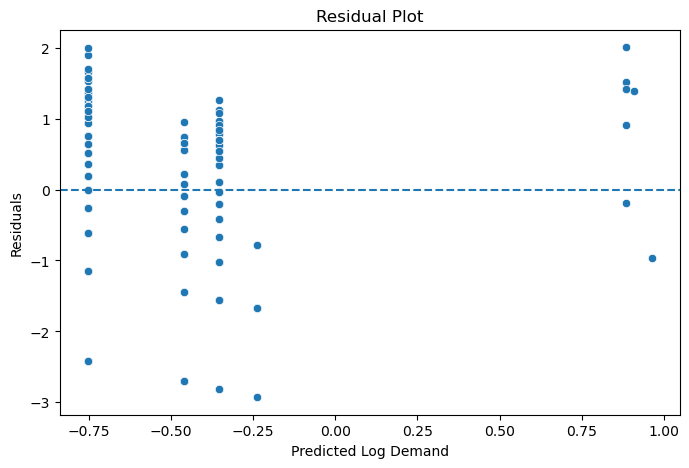

In [17]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Log Demand")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [20]:
model, elasticity


(LinearRegression(), 0.18132729373772172)